![USD](usd.png)

### University of San Diego 

### Master of Science, Applied Data Science 

#### Contributors

- Hoori Javadnia
- Salvador Sanchez
- Jacqueline Vo

Short Description and Objectives:
TallMart wants to determine how to approach their sales strategy in anticipation of Thanksgiving and Black Friday, the biggest sales event of the United States. TallMart has accumulated data on their customer base, and wants to understand their target market and potential products to markdown for this event.


Purpose:

This study aims to develop accurate and reliable predictive models that enable us to estimate the purchase amount for a retail store, given the sales transactions of the store. The provided data includes information about the user, the products, the shoppers age and occupation, their city and marital status, among the other factors.
Background:

TallMart was previously known as a large brick and mortar store, but since the COVID-19 pandemic, customers have shifted from preferring in-person shopping to online. With the holiday season coming up, TallMart wants to maintain their current customer base and capitalize upon online shopping marketing strategies. Black Friday is one of the largest retail mega-sale events, and oftentimes the most profitable quarters for retail companies. TallMart has requested that the data collected from their customers be analyzed to create targeted marketing campaigns that will influence buying decisions during the holiday season.

Current Situation:

The data set contains half a million observations, within the data set there are approximately 6,000 users and 4,000 products. This would indicate multiple records per user and single observations by product. With the user and product information conjunction with the other variables a model will be developed to predict purchase amount by retail store and profile customer features that influence and consumer behavior. Secondary models will be designed to understand market basket behavior, find the relationship between products which will produce insight to the marketing department for targeted marketing and add on purchasing.

Conclusion:
This study will enable the Big Box Company to further take advantage of the Black Friday sales via wisely investing upon its online shopping marketing strategies. In particular, by developing an accurate and robust predictive model, the company will be able to estimate the purchase amount customized for each shopper profile, allowing the company to target the correct shoppers with different forms of online marketing strategies. Furthermore, the outcome of the study will help the company better manage its inventory of multiple types of bricks and mortars as well as giving it an opportunity to better plan for the deliveries and shipments.


***

# 1. Data Overview

### Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

- User_ID: Unique ID of the user. 
- Product_ID: Unique ID of the product. 
- Gender: indicates the gender of the person making the transaction.
- Age: indicates the age group of the person making the transaction.
- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
- Marital_Status: is 0 if the user is not married and 1 otherwise.
- Product_Category_1 to _3: Category of the product. All 3 are already labeled with numbers.
- Purchase: Purchase amount.

***

# 2. Data imports

In [1]:
#Import required packages 

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,f1_score
from dmba import classificationSummary

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from dmba.metric import AIC_score
import math
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Library we need for modeling

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

#Figure Config
#sns.set_theme(style="whitegrid")
#sns.set_context("poster")

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
#Import csv into train/test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#Training dataset
display(train_df.head())
train_df.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


(550068, 12)

In [4]:
#Test dataset
display(test_df.head())
test_df.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


(233599, 11)

# 3. Exploratory Data Analysis (EDA)
For easier navigation, we will be focusing on the training dataset.
## 3.1 Data Quality Report

In [6]:
df = train_df


#Initial table
freqDF = pd.DataFrame(columns=['Feature',
                               'Mode',
                               'Mode Freq.',
                               'Mode %',
                               '2nd Mode',
                               '2nd Mode Freq.',
                               '2nd Mode %'])
for col in df.columns:
    freq = df[col].value_counts()
    freqdf = freq.to_frame()
    fRow = freqdf.iloc[0]
    secRow = freqdf.iloc[1]
    fPrct = fRow[0] / len(df[col])
    secPrct = secRow[0] / len(df[col])
    try:
        mode1 = int(fRow.name)
    except:
        mode1 = fRow.name
    try:
        mode2 = int(secRow.name)
    except:
        mode2 = secRow.name
    freqDF = freqDF.append({'Feature':col,
                            'Mode':mode1,
                            'Mode Freq.':fRow[0],
                            'Mode %':fPrct,\
                            '2nd Mode':mode2,
                            '2nd Mode Freq.':secRow[0],
                            '2nd Mode %':secPrct},
                            ignore_index=True)

freqDF = freqDF.set_index('Feature')

#Nulls, Counts, Cardinality
NUllFeatures = round(df.isnull().sum() / df.shape[0],4)\
      .sort_values(ascending=False)
Count = df.count()
uni = df.nunique()

#Formating
NUllFeatures.to_frame(name="% Miss.")
Count.to_frame(name="Count")
uni.to_frame()
result = pd.concat([Count, NUllFeatures,uni], axis=1)
result.columns =["Count","% Miss.","Card."]
result = pd.concat([result, freqDF], axis=1)
result.style.format({'% Miss.': "{:.1%}",
                     'Mode %': "{:.0%}",
                     '2nd Mode %': "{:.0%}",
                     'Count': "{:,}",
                     'Card.': "{:,}",
                     'Mode Freq.': "{:,}",
                    '2nd Mode Freq.': "{:,}"})

,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
User_ID,"550,068",0.0%,"5,891",1001680,"1,026",0%,1004277,979,0%
Product_ID,"550,068",0.0%,"3,631",P00265242,"1,880",0%,P00025442,"1,615",0%
Gender,"550,068",0.0%,2,M,"414,259",75%,F,"135,809",25%
Age,"550,068",0.0%,7,26-35,"219,587",40%,36-45,"110,013",20%
Occupation,"550,068",0.0%,21,4,"72,308",13%,0,"69,638",13%
City_Category,"550,068",0.0%,3,B,"231,173",42%,C,"171,175",31%
Stay_In_Current_City_Years,"550,068",0.0%,5,1,"193,821",35%,2,"101,838",19%
Marital_Status,"550,068",0.0%,2,0,"324,731",59%,1,"225,337",41%
Product_Category_1,"550,068",0.0%,20,5,"150,933",27%,1,"140,378",26%
Product_Category_2,"376,430",31.6%,17,8,"64,088",12%,14,"55,108",10%


<div class="alert alert-block alert-success">
The data quality report shows that each observations in the data represent a product being sold, We have 550,068 observation but only 5,891 users that purchased from population of 3,631 products.
</div>

## 3.2 Initial visualizations

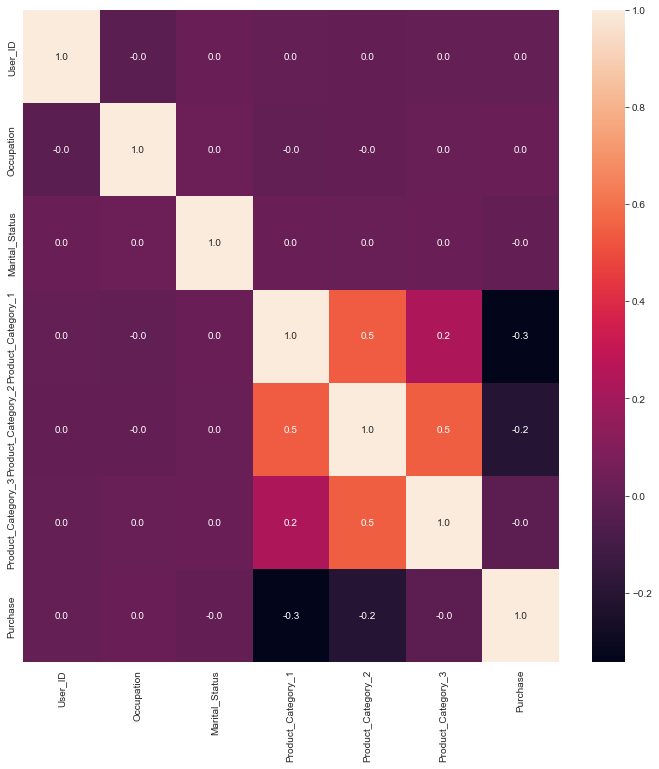

In [7]:
# Preliminary identification of correlation within features
corr = train_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True, annot = True,
            fmt = '.1f', annot_kws = {'size': 10})

plt.show()

Most of the variables don't appear to be correlated. Some relationships that we can explore are:
- Purchase
- Product_Category_1
- Product_Category_2
- Product_Category_3

But first, we can explore the customers and their purchasing behavior:

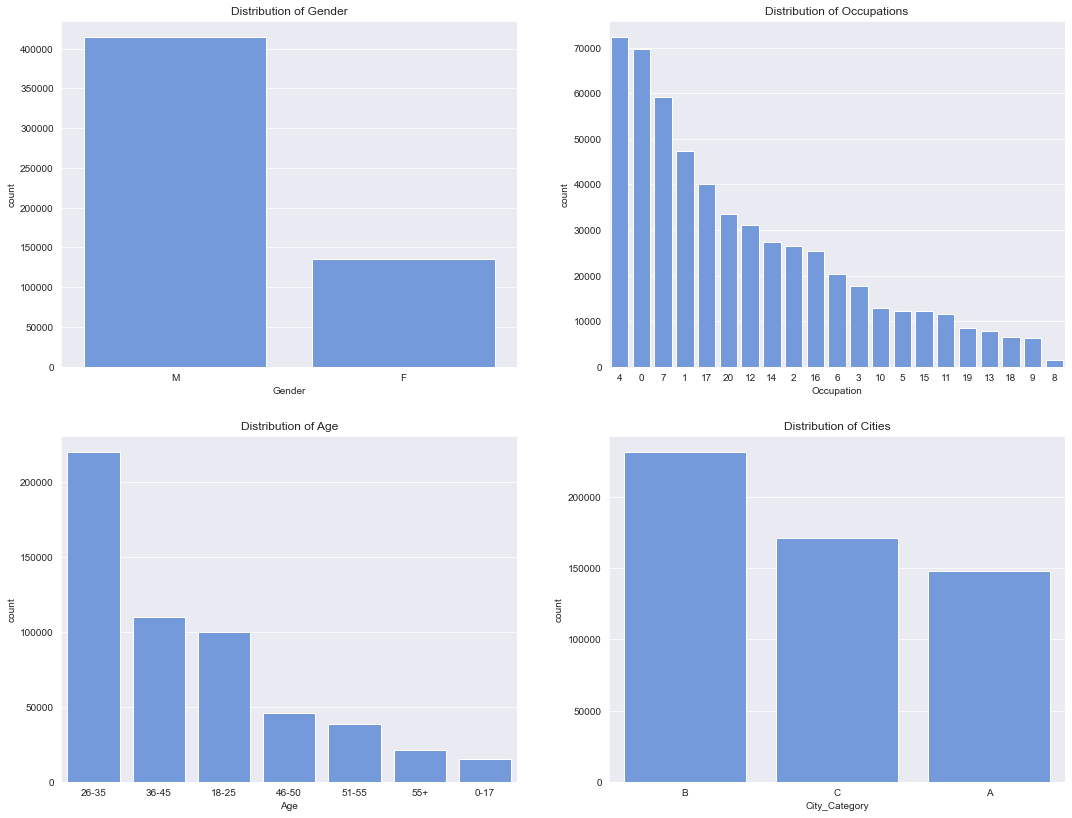

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))

ax = sns.countplot(data=train_df, x='Gender', color='cornflowerblue', order=train_df['Gender'].value_counts().index,
                   ax=axes[0,0]).set(title='Distribution of Gender')

ax = sns.countplot(data=train_df, x='Occupation', color='cornflowerblue', order=train_df['Occupation'].value_counts().index,
                   ax=axes[0,1]).set(title='Distribution of Occupations')

ax = sns.countplot(data=train_df, x='Age', color='cornflowerblue', order=train_df['Age'].value_counts().index,
                   ax=axes[1,0]).set(title='Distribution of Age')

ax = sns.countplot(data=train_df, x='City_Category', color='cornflowerblue', order=train_df['City_Category'].value_counts().index,
                   ax=axes[1,1]).set(title='Distribution of Cities')

<div class="alert alert-block alert-success">
We will need to keep in mind that our data has a larger sample of customers that are men, in the 26-35 year old range, living in City Category B, and working in occupation 4, 0, and 7.
</div>

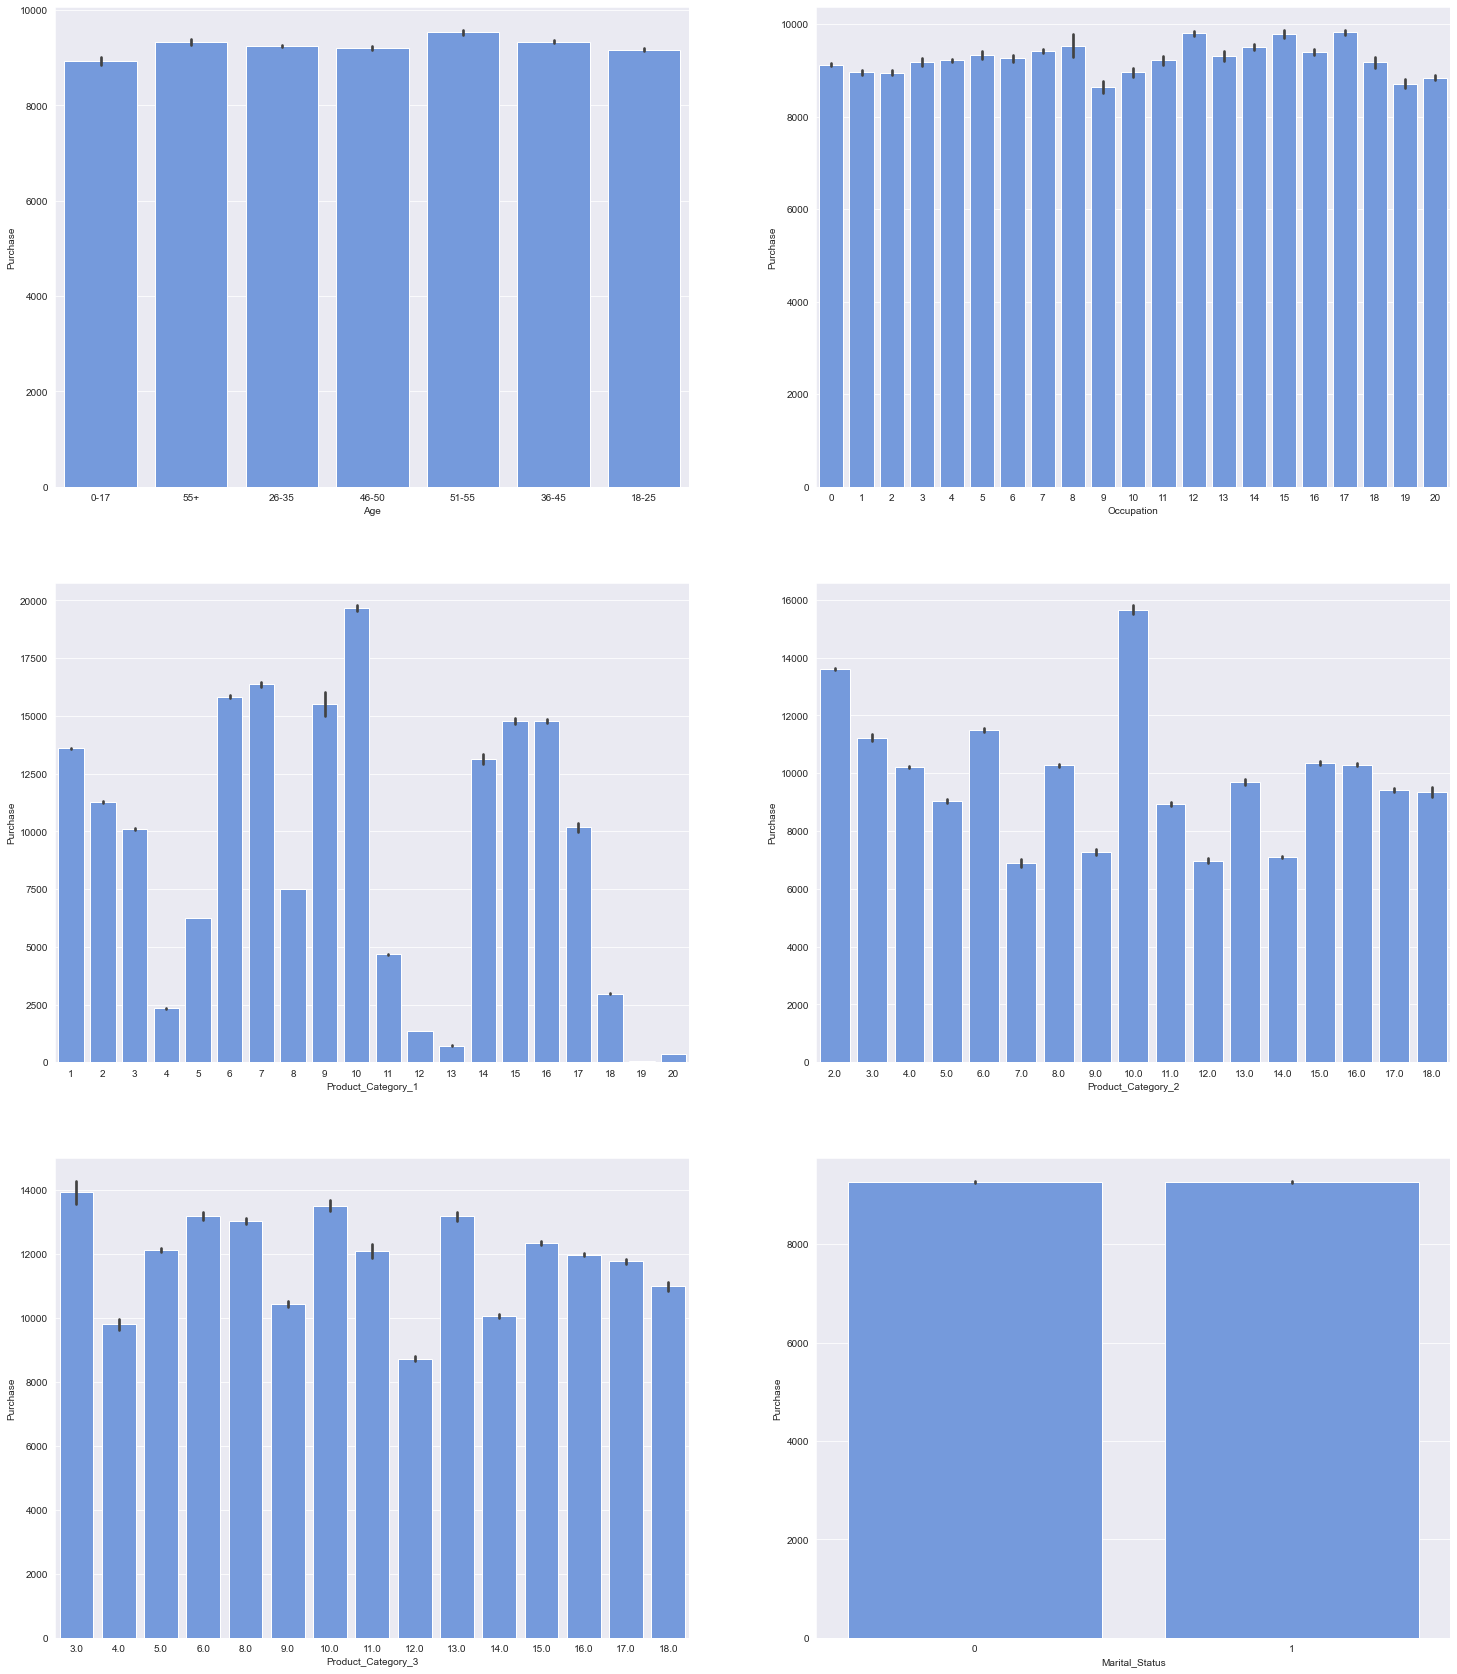

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,30))

ax = sns.barplot(x='Age', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[0,0])

ax = sns.barplot(x='Occupation', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[0,1])

ax = sns.barplot(x='Product_Category_1', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[1,0])

ax = sns.barplot(x='Product_Category_2', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[1,1])

ax = sns.barplot(x='Product_Category_3', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[2,0])

ax = sns.barplot(x='Marital_Status', y='Purchase', data=train_df,
                 color='cornflowerblue', ax=axes[2,1])

<div class="alert alert-block alert-success">
The age, occupation, and marital status of a customer appear to not generally influence how much money they spend. Instead, we can look at the product categories. In Category 1, 9 performs the best, while 19 has no profit generated.
</div>

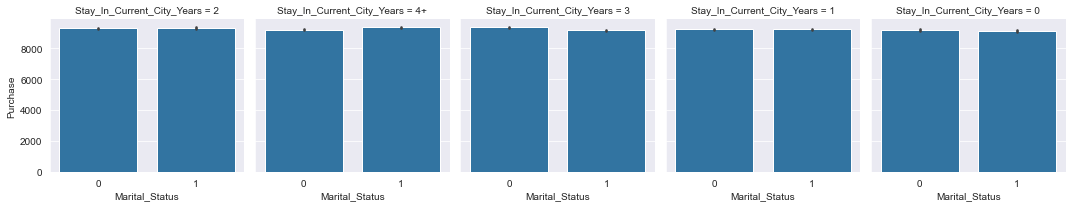

In [10]:
ax = sns.FacetGrid(data=train_df,col="Stay_In_Current_City_Years")
ax.map(sns.barplot, "Marital_Status", "Purchase");

<div class="alert alert-block alert-success">
Regardless of a customer's marital status, it appears that the purchase amount does not change nor does the years someone stays in a certain city appear to be related.
</div>

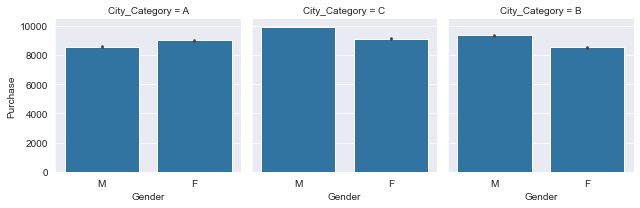

In [11]:
ax = sns.FacetGrid(data=train_df,col="City_Category")
ax.map(sns.barplot, "Gender", "Purchase")
plt.show()

<div class="alert alert-block alert-success">
When looking at the change in purchase price by gender, men marginally purchase more in City_Category B and C. There is very little difference in City Category_A.
</div>

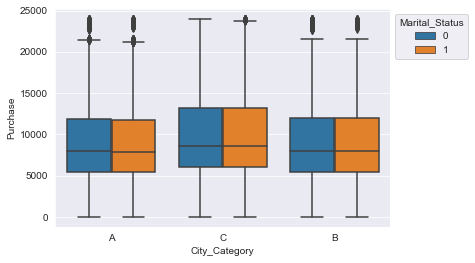

In [12]:
ax = sns.boxplot(x='City_Category', y='Purchase', hue='Marital_Status', data=train_df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<div class="alert alert-block alert-success">
Even when comparing purchase habits by city_category and martial_status, there is very little difference.
</div>

# 4. Data Pre-processing
## 4.1 Data Cleaning
The initial visualizations from 3.2 show no strong correlation between customer characteristics and the purchases. Instead, we might want to look at the relationship of product categories.

In [13]:
# User_ID and Product_ID have no correlation to the products customers would gravitate towards purchasing
dropped_var = ['Product_ID']

train_df.drop(dropped_var, axis=1, inplace=True)
test_df.drop(dropped_var, axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [14]:
# addressing stay in city feature
def stay_in_city(item):
    if item == '4+':
        item = 4
    return int(item)

train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].apply(stay_in_city)
test_df['Stay_In_Current_City_Years'] = test_df['Stay_In_Current_City_Years'].apply(stay_in_city)

In [15]:
# We are assuming that the product categories are independent of each other, and opted to impute missing values
median = train_df['Product_Category_2'].median()
train_df['Product_Category_2'].fillna(median, inplace=True)

median = train_df['Product_Category_3'].median()
train_df['Product_Category_3'].fillna(median, inplace=True)

median = test_df['Product_Category_2'].median()
test_df['Product_Category_2'].fillna(median, inplace=True)

median = test_df['Product_Category_3'].median()
test_df['Product_Category_3'].fillna(median, inplace=True)

<AxesSubplot:xlabel='Purchase'>

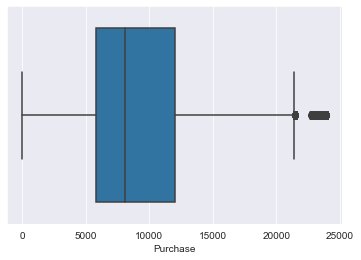

In [16]:
sns.boxplot(df['Purchase'])

In [17]:
# addressing Age feature
def encode_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

train_df['Age'] = train_df['Age'].apply(encode_age)
test_df['Age'] = test_df['Age'].apply(encode_age)

In [18]:
# addressing Gender feature
def encode_gender(gender):
    if gender == 'F':
        return 1
    return 0

train_df['Gender'] = train_df['Gender'].apply(encode_gender)
test_df['Age'] = test_df['Gender'].apply(encode_gender)

In [19]:
# addressing City_Category
train_df = pd.get_dummies(train_df, prefix=['City_Category'], columns=['City_Category'])
test_df = pd.get_dummies(test_df, prefix=['City_Category'], columns=['City_Category'])

In [48]:
train_df

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,1,0,10,2,0,3,9.0,14.0,8370,1,0,0
1,1000001,1,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,1,0,10,2,0,12,9.0,14.0,1422,1,0,0
3,1000001,1,0,10,2,0,12,14.0,14.0,1057,1,0,0
4,1000002,0,6,16,4,0,8,9.0,14.0,7969,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,0,5,13,1,1,20,9.0,14.0,368,0,1,0
550064,1006035,1,2,1,3,0,20,9.0,14.0,371,0,0,1
550065,1006036,1,2,15,4,1,20,9.0,14.0,137,0,1,0
550066,1006038,1,6,1,2,0,20,9.0,14.0,365,0,0,1


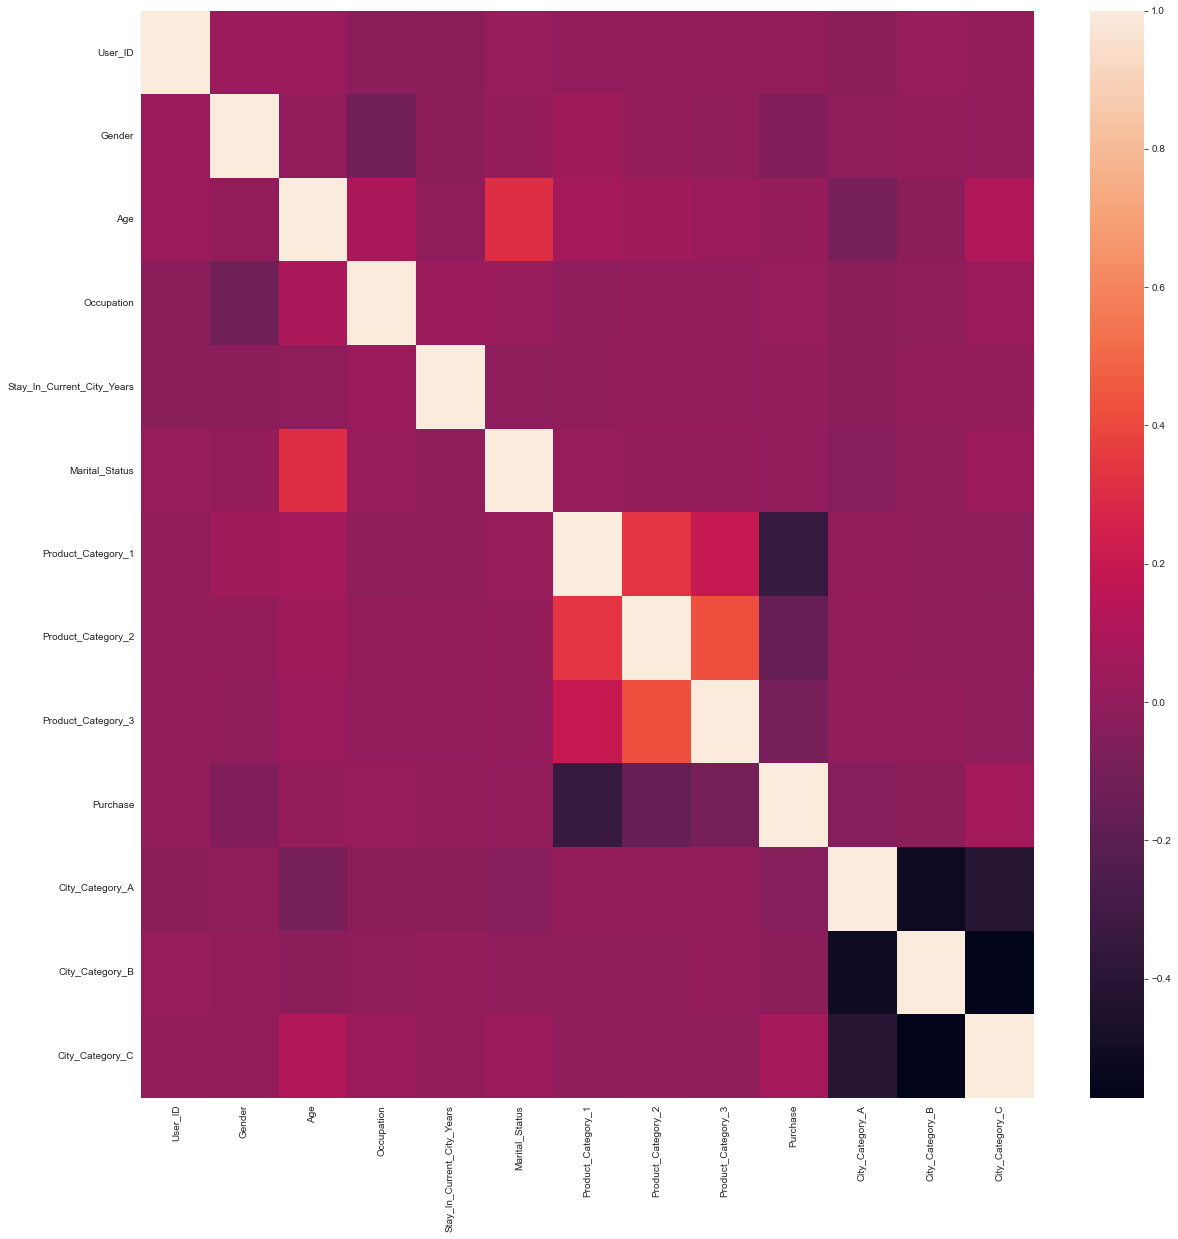

In [21]:
# Correlation of encoded features
corr = train_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, cbar = True, annot = False,
            fmt = '.1f', annot_kws = {'size': 10})
plt.show()

In [47]:
train_df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_Category_A               0
City_Category_B               0
City_Category_C               0
dtype: int64

In [49]:
test_df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
City_Category_A               0
City_Category_B               0
City_Category_C               0
dtype: int64

## 4.2 Data Splitting

In [50]:
test_df.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'City_Category_A', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [51]:
train_df

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,1,0,10,2,0,3,9.0,14.0,8370,1,0,0
1,1000001,1,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,1,0,10,2,0,12,9.0,14.0,1422,1,0,0
3,1000001,1,0,10,2,0,12,14.0,14.0,1057,1,0,0
4,1000002,0,6,16,4,0,8,9.0,14.0,7969,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,0,5,13,1,1,20,9.0,14.0,368,0,1,0
550064,1006035,1,2,1,3,0,20,9.0,14.0,371,0,0,1
550065,1006036,1,2,15,4,1,20,9.0,14.0,137,0,1,0
550066,1006038,1,6,1,2,0,20,9.0,14.0,365,0,0,1


In [52]:
# Variable split
y = train_df['Purchase']
X = train_df.drop(columns=['Purchase'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [54]:
print('X_train Shape: ',X_train.shape)
print('y_train Shape: ',y_train.shape)

print('X_test Shape: ',X_test.shape)
print('y_test Shape: ',y_test.shape)

X_train Shape:  (330040, 12)
y_train Shape:  (330040,)
X_test Shape:  (220028, 12)
y_test Shape:  (220028,)


In [55]:
y_train.describe()

count    330040.000000
mean       9264.665728
std        5028.043741
min          12.000000
25%        5822.000000
50%        8047.000000
75%       12058.000000
max       23961.000000
Name: Purchase, dtype: float64

# Data Modeling

### Base: Linear Regression Model

In [56]:
base_model = LinearRegression()
base_model.fit(X_train,y_train)
predicted_purchase = base_model.predict(X_test)

Text(0, 0.5, 'Purchase (Predicted)')

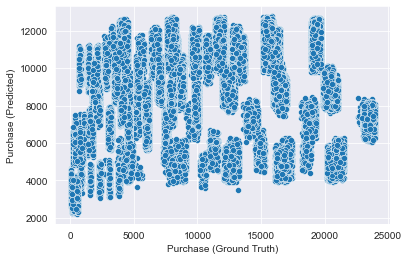

In [57]:
predicted_purchase_train = base_model.predict(X_train)
sns.scatterplot(y_train,predicted_purchase_train)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

In [58]:
regressionSummary(y_train,predicted_purchase_train)
print('Training R-square Score: ', r2_score(y_train, predicted_purchase_train))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4695.1823
            Mean Absolute Error (MAE) : 3592.3643
          Mean Percentage Error (MPE) : -88.5920
Mean Absolute Percentage Error (MAPE) : 111.0016
Training R-square Score:  0.12801675904592147


Text(0, 0.5, 'Purchase (Predicted)')

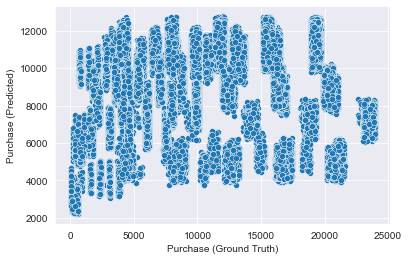

In [59]:
sns.scatterplot(y_test,predicted_purchase)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

In [60]:
regressionSummary(y_test,predicted_purchase)
print('Training R-square Score: ', r2_score(y_test, predicted_purchase))


Regression statistics

                      Mean Error (ME) : -1.1733
       Root Mean Squared Error (RMSE) : 4690.4646
            Mean Absolute Error (MAE) : 3584.7557
          Mean Percentage Error (MPE) : -89.3241
Mean Absolute Percentage Error (MAPE) : 111.6910
Training R-square Score:  0.12544340088872563


### Decision Tree Model

In [61]:
dtr = DecisionTreeRegressor()    
DecisionTreeRegressor(ccp_alpha=0.0,
                      criterion='mse',
                      max_depth=None,
                      max_features=None,
                      max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      #min_impurity_split=None,
                      min_samples_leaf=1,
                      min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None,
                      splitter='best') 

dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("Training R-squared Error Score:", score)

Training R-squared Error Score: 0.8738435843971187


Text(0, 0.5, 'Purchase (Predicted)')

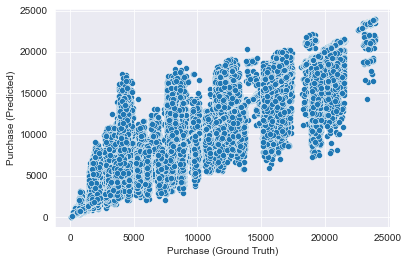

In [62]:
sns.scatterplot(y_train,dtr.predict(X_train))

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

In [63]:
dtr_prediction = dtr.predict(X_test)

score = dtr.score(X_test, y_test)
print("Testing R-squared Error Score: ", score)

Testing R-squared Error Score:  0.5058568731916124


Text(0, 0.5, 'Purchase (Predicted)')

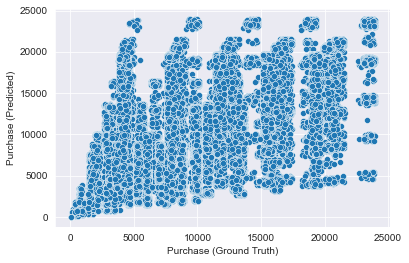

In [64]:
sns.scatterplot(y_test,dtr_prediction)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

### Hyperparameter Tuning: Decision Tree Model

In [65]:
import sklearn
max_depth_vector = list(range(1,20))
score_collector = []
for maxdepth in max_depth_vector:
    dtr = DecisionTreeRegressor(max_depth=maxdepth)
    dtr.fit(X_train, y_train)
    dtr_prediction = dtr.predict(X_test)
    score = sklearn.metrics.r2_score(y_test, dtr_prediction)
    score_collector.append({maxdepth:score})
score_collector

[{1: 0.2680678417383294},
 {2: 0.30906958392301065},
 {3: 0.43946325536089115},
 {4: 0.47462236748496944},
 {5: 0.5773857050358766},
 {6: 0.6423729022092413},
 {7: 0.6456942997516321},
 {8: 0.647933480637265},
 {9: 0.649838540887159},
 {10: 0.6499151229967026},
 {11: 0.649405658776752},
 {12: 0.6468648686950593},
 {13: 0.6434367920575996},
 {14: 0.6391665628512853},
 {15: 0.6337950003961913},
 {16: 0.6266640486432342},
 {17: 0.6173922201614989},
 {18: 0.6080874658508699},
 {19: 0.5984035962996239}]

### K-Nearest Neighbor (K-NN) Model

In [40]:
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)
Knn_prediction = knn_model.predict(X_test)
Knn_prediction_train = knn_model.predict(X_train)

In [41]:
print('Training Mean-squared Error Score: ', mean_squared_error(y_train,Knn_prediction_train))
print('Training R-square Score: ', r2_score(y_train, Knn_prediction_train))

Training Mean-squared Error Score:  6405649.077542116
Training R-square Score:  0.7466234814322551


Text(0, 0.5, 'Purchase (Predicted)')

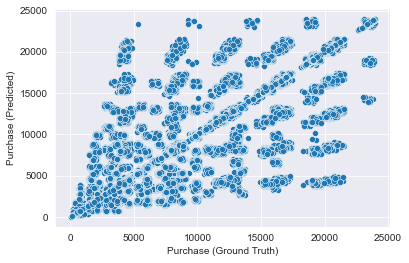

In [42]:
sns.scatterplot(y_train,Knn_prediction_train)
#plt.xlim([0,25000])
#plt.ylim([0,25000])
plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

In [43]:
print('Testing Mean-squared Error Score: ', mean_squared_error(y_test,Knn_prediction))
print('Testing R-square Score: ', r2_score(y_test, Knn_prediction))

Testing Mean-squared Error Score:  21877859.38682804
Testing R-square Score:  0.1303168981101136


Text(0, 0.5, 'Purchase (Predicted)')

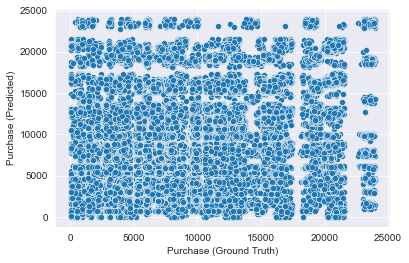

In [44]:
sns.scatterplot(y_test,Knn_prediction)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

### Hyperparameter Tuning: K-Nearest Neighbor Model

In [45]:
n_neighbor_vector = list(range(20,23))
score_collector = []
for n_neighbor in n_neighbor_vector:
    knn_model = KNeighborsRegressor(n_neighbor)
    knn_model.fit(X_train, y_train)
    Knn_prediction = knn_model.predict(X_test)
    score = sklearn.metrics.r2_score(y_test, Knn_prediction)
    score_collector.append({n_neighbor:score})
score_collector

[{20: 0.28566849679239403}, {21: 0.2827632265356903}, {22: 0.2801000419005546}]

### Random Forest Model

In [66]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf_prediction_train = rf.predict(X_train)

In [67]:
print('Training Mean-squared Error Score: ', mean_squared_error(y_train,rf_prediction_train))
print('Training R-square Score: ', r2_score(y_train, rf_prediction_train))

Training Mean-squared Error Score:  17385312.310819056
Training R-square Score:  0.31232106938669146


Text(0, 0.5, 'Purchase (Predicted)')

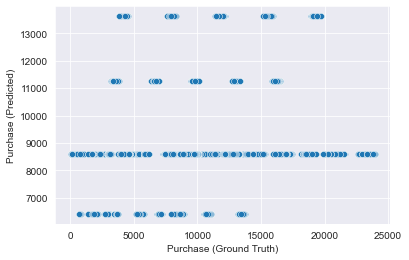

In [68]:
sns.scatterplot(y_train,rf_prediction_train)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

In [69]:
rf_prediction = rf.predict(X_test)
print('Testing Mean-squared Error Score: ', mean_squared_error(y_test,rf_prediction))
print('Testing R-square Score: ', r2_score(y_test, rf_prediction))

Testing Mean-squared Error Score:  17381126.303674582
Testing R-square Score:  0.30906988792420387


Text(0, 0.5, 'Purchase (Predicted)')

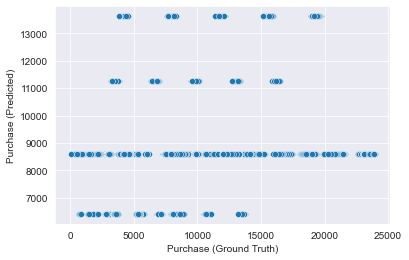

In [70]:
sns.scatterplot(y_test,rf_prediction)

plt.xlabel('Purchase (Ground Truth)')
plt.ylabel('Purchase (Predicted)')

### Hyperparameter Tuning: Random Forest Model

In [71]:
# Taking a really long time to load
max_depth_vector = list(range(1,20))
score_collector = []
for maxdepth in max_depth_vector:
    rf = RandomForestRegressor(max_depth=maxdepth, random_state=0)
    rf.fit(X_train, y_train)
    rf_prediction = rf.predict(X_test)
    score = sklearn.metrics.r2_score(y_test, rf_prediction)
    score_collector.append({maxdepth:score})
score_collector

KeyboardInterrupt: 

In [73]:
print("Mean Squared Error (MSE) Score: ", mean_squared_error(y_test, rf_prediction))
print("Root Mean Squared Error (RMSE) Score: ", math.sqrt(mean_squared_error(y_test, rf_prediction)))
print("Mean Absolute Error (MAE) Score", mean_absolute_error(y_test, rf_prediction))

Mean Squared Error (MSE) Score:  8791656.661250293
Root Mean Squared Error (RMSE) Score:  2965.0727918974085
Mean Absolute Error (MAE) Score 2232.8218085064577



## Model Performance

In [74]:
score_base_model = cross_val_score(base_model, X, y, cv=7)
score_dtr = cross_val_score(dtr, X, y, cv=7)
score_knn_model = cross_val_score(knn_model, X, y, cv=7)
score_rf = cross_val_score(rf, X, y, cv=7)

KeyboardInterrupt: 

In [76]:
print("Base Model \n Accuracy: %0.2f \n StDev: %0.2f" % (score_base_model.mean(), score_base_model.std()))
print("Decision Tree Model \n Accuracy: %0.2f \n StDev: %0.2f" % (score_dtr.mean(), score_dtr.std()))
print("K-Nearest Neighbors Model \n Accuracy: %0.2f \n StDev: %0.2f" % (score_knn_model.mean(), score_knn_model.std()))
print("Random Forest Model \n Accuracy: %0.2f \n StDev: %0.2f" % (score_rf.mean(), score_rf.std()))

Base Model 
 Accuracy: 0.12 
 StDev: 0.04
Decision Tree Model 
 Accuracy: 0.61 
 StDev: 0.02
K-Nearest Neighbors Model 
 Accuracy: 0.30 
 StDev: 0.04


NameError: name 'score_rf' is not defined

# Final Model

## Results
Rubric: All project objectives are fully met, the findings are presented clearly, and the question(s) are technically addressed in the report and presentation.

# Apriori Analysis

In [ ]:
apro_dataset['Count'] = 1
apro_dataset

In [ ]:
#apro_datasetx = apro_dataset.groupby('User_ID','Product_ID').sum().unstack()
user_item = apro_dataset.set_index(['User_ID','Product_ID'])['Count'].unstack().fillna(0)
user_item

In [ ]:
import heapq
from collections import defaultdict
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split 

In [ ]:
# create frequent itemsets
itemsets = apriori(user_item, min_support=0.06, use_colnames=True)
# convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

In [ ]:
rules_list = rules.sort_values(by=['lift'], ascending=False).head(10)
rules_list